In [1]:
import os
import pickle
import pandas as pd
from datetime import datetime
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from googleapiclient.discovery import build
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from PIL import Image
import statsmodels.api as sm
from api_functions import (get_channel_data_from_handle, get_playlist_items_from_id, 
                           get_activities_data_from_id, get_analytics_data_per_video,
                           extract_hashtags)

current_date = datetime.now().date()

# this is using login to the API via OAuth which enables private data for your own channel

credentials = None

# token.pickle stores the user's credentials from previously successful logins
if os.path.exists('token.pickle'):
    print('Loading credentials from file...')
    with open('token.pickle', 'rb') as token:
        credentials = pickle.load(token)

if not credentials or not credentials.valid:
    if credentials and credentials.expired and credentials.refresh_token:
        print('Refreshing Access Token...')
        credentials.refresh(Request())
    else:
        print('Fetching new tokens...')
        flow = InstalledAppFlow.from_client_secrets_file(
            'client_secrets.json',
            scopes=['https://www.googleapis.com/auth/youtube.readonly']
            )
        
        flow.run_local_server(port=8080, prompt='consent')
        # you receive access and refresh tokens
        # refresh token is to get new acccess tokens
        credentials = flow.credentials

        #save
        with open('token.pickle', 'wb') as f:
            print('Saving credentials for future use...')
            pickle.dump(credentials, f)

# Create YouTube API objects
youtube = build('youtube', 'v3', credentials=credentials)
youtubeAnalytics = build('youtubeAnalytics', 'v2', credentials=credentials)

Loading credentials from file...
Refreshing Access Token...


In [2]:
# List of dragonboat themed channel handles
dragon_handles = [
    'juicedragonboat',
    'ViennaDragons',
    'lagandragons7880',
    'slothsdb',
    'brisbanetyphoon',
    'riptidedragonboat',
    'ucidragonboat',
    'Rabadragon',
    'DBChoppaNZ',
    'PaddlesUpDB',
    'dragonboatcoach',
    'dragonboatbc1989',
    'eternaldragon6799',
    'SpeedformDragons',
    'dragonboatattitude1814',
    'mainloonge.v.391',
    'typhoondbc',
    'heatinternationaldragonboa8200',
    'dwddragonboat1343',
    'ubccurrent',
    'SiargaoDragons',
    'CalDragonboat',
    'sydneydragonblades',
    'DEDragonboatEvolution',
    'jakartapaddleclub',
    'dragonboatinnovate',
    'FiretruckDragonBoat',
    'suenfengloong',
    'DragonBoatsNSW',
    'kpdragons9622',
    '22DragonsMtl',
    'yarrariverdragons',
    '-challengeo.f.tdragonboatt3907',
    'brisbaneriverdragons2955',
    'impulsedragon4787',
    'dragonclubbrno3782',
    'k1dragonboat',
    'viennapinkdragons7549',
    'chdbaus',
    'GreifenseeDragons',
    'imperfectosdragonboat8766',
    'ktbdbteam4493',
    'PagaieRosa',
    'bremendraggstars',
    'raildragons2780',
    'wordontheroad2475',
    'alshisharks-drachenboot',
    'ISOKAZEDolfhin',
    'zainudineza9881',
    'dragonboathouse',
    'Wolf_TW_Dragonboat_Team',
    'dragonboatbangple7571',
    'teamlightwave',
    'celica1822000',
    'hongkongjapanesedragonboat',
    'titansdubaidragonboatteam8485'
]

mixed_channels = [
    'loszokkos',
    'figemeier',
    'decemberman7511',
    'andylikewater',
    'jeremyrichmond7145',
    'AllanShek',
    'JacobNotten',
    'samrunner198',
    'BoSeeHK',
    'dorkypanda101',
    'Whiteflower46',
    'BigArm100',
    'BobMina',
    'jasonator40',
    'randomtexaspaddler',
    'drumaron',
    'malderhout',
    'Korschi76',
    'mason030',
    'christianlemay6310',
    'peterjolly4551',
    'jhanphillipco',
    'longestnamepwnsal'
]

In [3]:
# Initialize an empty list to store channel data dictionaries
dragon_channel_data_list = []

# Loop over handles and collect channel data
for handle in dragon_handles:
    channel_data = get_channel_data_from_handle(youtube, handle)
    dragon_channel_data_list.append(channel_data)

# Convert list of dictionaries into a Pandas DataFrame
dragonboat_df = pd.DataFrame(dragon_channel_data_list).sort_values(by='viewCount', ascending=False)


# Initialize an empty list to store channel data dictionaries
mixed_channel_data_list = []

# Loop over handles and collect channel data
for handle in mixed_channels:
    channel_data = get_channel_data_from_handle(youtube, handle)
    mixed_channel_data_list.append(channel_data)

# Convert list of dictionaries into a Pandas DataFrame
mixed_df = pd.DataFrame(mixed_channel_data_list).sort_values(by='viewCount', ascending=False)


In [4]:
my_channel = get_channel_data_from_handle(youtube, 'AlexMelemenidis')

In [5]:
my_channel

{'handle': '@alexmelemenidis',
 'id': 'UC7p805M43uY6WrJ29v3Fe7g',
 'title': 'Alex Melemenidis',
 'description': "What's up, everyone!\nMy name is Alex and I live in Frankfurt am Main, Germany. In my free time I like to travel, paddle in a dragonboat and do all other kinds of sports and last but not least: edit videos and share them with the world via YouTube!\n\nYou can find me also on Instagram:\nhttps://www.instagram.com/lazodeuts/\n\n",
 'customUrl': 'https://www.youtube.com/@alexmelemenidis',
 'publishedAt': datetime.date(2006, 10, 22),
 'viewCount': 19773,
 'subscriberCount': 40,
 'videoCount': 61,
 'topicIds': ['/m/03glg', '/g/120yrv6h', '/m/019_rr', '/m/06ntj'],
 'topicCategories': ['https://en.wikipedia.org/wiki/Hobby',
  'https://en.wikipedia.org/wiki/Tourism',
  'https://en.wikipedia.org/wiki/Lifestyle_(sociology)',
  'https://en.wikipedia.org/wiki/Sport'],
 'unsubscribedTrailer': False,
 'uploads': 'UU7p805M43uY6WrJ29v3Fe7g'}

In [6]:
dragonboat_df.head()

,handle,id,title,description,customUrl,publishedAt,viewCount,subscriberCount,videoCount,topicIds,topicCategories,unsubscribedTrailer,uploads
53,@celica1822000,UCmPGStD91J6fyV2w7viDB4g,ISOKAZE.HARUNA,,https://www.youtube.com/@celica1822000,2006-09-11,1063202,2770,161,"[/m/0403l3g, /m/019_rr, /m/025zzc, /m/0bzvm2, ...",[https://en.wikipedia.org/wiki/Role-playing_vi...,False,UUmPGStD91J6fyV2w7viDB4g
45,@wordontheroad2475,UCung6s_BfcNu1r4oy51TLrQ,WordOnTheRoad,The World Of Dragon Boat,https://www.youtube.com/@wordontheroad2475,2011-10-30,388609,324,212,"[/m/07yv9, /m/019_rr, /m/06ntj]","[https://en.wikipedia.org/wiki/Vehicle, https:...",False,UUung6s_BfcNu1r4oy51TLrQ
30,@22dragonsmtl,UC80UXJlQJDhRvnM8H-_KBEg,22Dragons,Club de bateaux-dragons. \nOrganisation de fes...,https://www.youtube.com/@22dragonsmtl,2011-02-21,330467,876,807,[/m/06ntj],[https://en.wikipedia.org/wiki/Sport],False,UU80UXJlQJDhRvnM8H-_KBEg
7,@rabadragon,UCB19iYbyIcuuiD8T0mlSREQ,Raba dragon,Hungary's first dragonboat team. est. 1997\n\n,https://www.youtube.com/@rabadragon,2013-11-24,292960,868,143,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",True,UUB19iYbyIcuuiD8T0mlSREQ
25,@dragonboatinnovate,UCUkhVebz6NhKjQIEpD4QoeA,Dragon Boat Innovate,"Incorporated in Singapore in 2010, DBI Private...",https://www.youtube.com/@dragonboatinnovate,2012-01-25,233535,255,24,"[/m/07yv9, /m/019_rr, /m/06ntj]","[https://en.wikipedia.org/wiki/Vehicle, https:...",False,UUUkhVebz6NhKjQIEpD4QoeA
12,@eternaldragon6799,UCNNv38sk4GxEhvRwzbxrg3A,Eternal Dragon,Founded 1989. One of the longest running U18 t...,https://www.youtube.com/@eternaldragon6799,2017-01-24,180130,330,26,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",True,UUNNv38sk4GxEhvRwzbxrg3A
22,@sydneydragonblades,UCEZTPi04gtWT5IeLo-mC1RA,sydneydragonblades,,https://www.youtube.com/@sydneydragonblades,2008-03-07,178497,159,167,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",False,UUEZTPi04gtWT5IeLo-mC1RA
9,@paddlesupdb,UC11ybZ25OiJtVwXfqBwICuw,Paddles Up,Paddles Up™ is here to help make YOU a better ...,https://www.youtube.com/@paddlesupdb,2021-01-17,177374,2020,22,"[/m/027x7n, /m/019_rr, /m/0kt51]",[https://en.wikipedia.org/wiki/Physical_fitnes...,True,UU11ybZ25OiJtVwXfqBwICuw
4,@brisbanetyphoon,UC1eA6O7MxB03B_aahWn_CQA,Brisbane Typhoon,,https://www.youtube.com/@brisbanetyphoon,2016-05-05,159378,451,135,"[/m/07yv9, /m/019_rr, /m/06ntj]","[https://en.wikipedia.org/wiki/Vehicle, https:...",True,UU1eA6O7MxB03B_aahWn_CQA
23,@dedragonboatevolution,UCKrM_SM2oW6PHAKdrb4A8jQ,龍DE船人 Dragonboat Evolution,We are a group of Year 3 students currently pu...,https://www.youtube.com/@dedragonboatevolution,2019-03-25,141252,329,10,"[/m/03glg, /m/019_rr, /m/06ntj]","[https://en.wikipedia.org/wiki/Hobby, https://...",False,UUKrM_SM2oW6PHAKdrb4A8jQ


In [7]:
dragonboat_df['views_per_video'] = dragonboat_df['viewCount'] / dragonboat_df['videoCount']
dragonboat_df['views_per_sub'] = dragonboat_df['viewCount'] / dragonboat_df['subscriberCount']

# Convert the 'publishedAt' column to Pandas Datetime objects
dragonboat_df['publishedAt'] = pd.to_datetime(dragonboat_df['publishedAt'])

# Calculate the age of the channel in years for each entry in the 'publishedAt' column
dragonboat_df['channel_age'] = (pd.to_datetime(current_date) - dragonboat_df['publishedAt']).dt.days // 365

In [8]:
mixed_df['views_per_video'] = mixed_df['viewCount'] / mixed_df['videoCount']
mixed_df['views_per_sub'] = mixed_df['viewCount'] / mixed_df['subscriberCount']

# Convert the 'publishedAt' column to Pandas Datetime objects
mixed_df['publishedAt'] = pd.to_datetime(mixed_df['publishedAt'])

# Calculate the age of the channel in years for each entry in the 'publishedAt' column
mixed_df['channel_age'] = (pd.to_datetime(current_date) - mixed_df['publishedAt']).dt.days // 365

In [9]:
dragonboat_df.head()

,handle,id,title,description,customUrl,publishedAt,viewCount,subscriberCount,videoCount,topicIds,topicCategories,unsubscribedTrailer,uploads,views_per_video,views_per_sub,channel_age
53,@celica1822000,UCmPGStD91J6fyV2w7viDB4g,ISOKAZE.HARUNA,,https://www.youtube.com/@celica1822000,2006-09-11,1063202,2770,161,"[/m/0403l3g, /m/019_rr, /m/025zzc, /m/0bzvm2, ...",[https://en.wikipedia.org/wiki/Role-playing_vi...,False,UUmPGStD91J6fyV2w7viDB4g,6603.739130,383.827437,17
45,@wordontheroad2475,UCung6s_BfcNu1r4oy51TLrQ,WordOnTheRoad,The World Of Dragon Boat,https://www.youtube.com/@wordontheroad2475,2011-10-30,388609,324,212,"[/m/07yv9, /m/019_rr, /m/06ntj]","[https://en.wikipedia.org/wiki/Vehicle, https:...",False,UUung6s_BfcNu1r4oy51TLrQ,1833.061321,1199.410494,12
30,@22dragonsmtl,UC80UXJlQJDhRvnM8H-_KBEg,22Dragons,Club de bateaux-dragons. \nOrganisation de fes...,https://www.youtube.com/@22dragonsmtl,2011-02-21,330467,876,807,[/m/06ntj],[https://en.wikipedia.org/wiki/Sport],False,UU80UXJlQJDhRvnM8H-_KBEg,409.500620,377.245434,13
7,@rabadragon,UCB19iYbyIcuuiD8T0mlSREQ,Raba dragon,Hungary's first dragonboat team. est. 1997\n\n,https://www.youtube.com/@rabadragon,2013-11-24,292960,868,143,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",True,UUB19iYbyIcuuiD8T0mlSREQ,2048.671329,337.511521,10
25,@dragonboatinnovate,UCUkhVebz6NhKjQIEpD4QoeA,Dragon Boat Innovate,"Incorporated in Singapore in 2010, DBI Private...",https://www.youtube.com/@dragonboatinnovate,2012-01-25,233535,255,24,"[/m/07yv9, /m/019_rr, /m/06ntj]","[https://en.wikipedia.org/wiki/Vehicle, https:...",False,UUUkhVebz6NhKjQIEpD4QoeA,9730.625000,915.823529,12
12,@eternaldragon6799,UCNNv38sk4GxEhvRwzbxrg3A,Eternal Dragon,Founded 1989. One of the longest running U18 t...,https://www.youtube.com/@eternaldragon6799,2017-01-24,180130,330,26,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",True,UUNNv38sk4GxEhvRwzbxrg3A,6928.076923,545.848485,7
22,@sydneydragonblades,UCEZTPi04gtWT5IeLo-mC1RA,sydneydragonblades,,https://www.youtube.com/@sydneydragonblades,2008-03-07,178497,159,167,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",False,UUEZTPi04gtWT5IeLo-mC1RA,1068.844311,1122.622642,16
9,@paddlesupdb,UC11ybZ25OiJtVwXfqBwICuw,Paddles Up,Paddles Up™ is here to help make YOU a better ...,https://www.youtube.com/@paddlesupdb,2021-01-17,177374,2020,22,"[/m/027x7n, /m/019_rr, /m/0kt51]",[https://en.wikipedia.org/wiki/Physical_fitnes...,True,UU11ybZ25OiJtVwXfqBwICuw,8062.454545,87.808911,3
4,@brisbanetyphoon,UC1eA6O7MxB03B_aahWn_CQA,Brisbane Typhoon,,https://www.youtube.com/@brisbanetyphoon,2016-05-05,159378,451,135,"[/m/07yv9, /m/019_rr, /m/06ntj]","[https://en.wikipedia.org/wiki/Vehicle, https:...",True,UU1eA6O7MxB03B_aahWn_CQA,1180.577778,353.388027,7
23,@dedragonboatevolution,UCKrM_SM2oW6PHAKdrb4A8jQ,龍DE船人 Dragonboat Evolution,We are a group of Year 3 students currently pu...,https://www.youtube.com/@dedragonboatevolution,2019-03-25,141252,329,10,"[/m/03glg, /m/019_rr, /m/06ntj]","[https://en.wikipedia.org/wiki/Hobby, https://...",False,UUKrM_SM2oW6PHAKdrb4A8jQ,14125.200000,429.337386,4


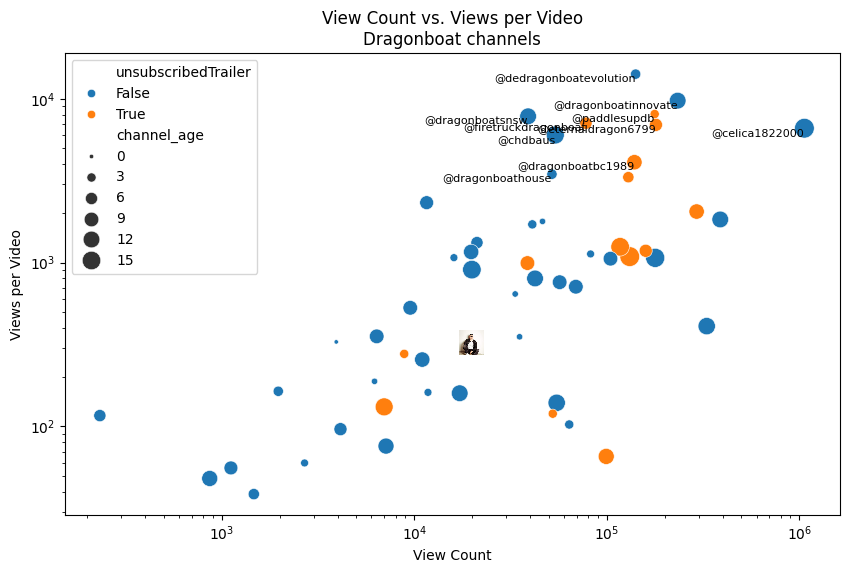

In [10]:
# visualise views and views per video as scatterplot

# Calculate 'views_per_video' for your own channel
your_channel_view_count = 19760  # Example view count for your channel
your_channel_video_count = 61     # Example video count for your channel
your_channel_views_per_video = your_channel_view_count / your_channel_video_count

# Load the logo image
logo_img = Image.open('channels4_profile.jpg')  # Replace 'logo.png' with the filename of your logo image


# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dragonboat_df, x='viewCount', y='views_per_video', hue='unsubscribedTrailer', size='channel_age', sizes=(10, 200))

# Add your own channel data point with logo as marker
ab = AnnotationBbox(OffsetImage(logo_img, zoom=0.1), (your_channel_view_count, your_channel_views_per_video), frameon=False)
plt.gca().add_artist(ab)

plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('View Count')
plt.ylabel('Views per Video')
plt.title('View Count vs. Views per Video\nDragonboat channels')

# Annotate top 10 performers in terms of 'views_per_video'
top_performers = dragonboat_df.nlargest(10, 'views_per_video')
for index, row in top_performers.iterrows():
    plt.text(row['viewCount'], row['views_per_video'], row['handle'], fontsize=8, ha='right', va='top')

# Show plot
plt.legend()
plt.show()

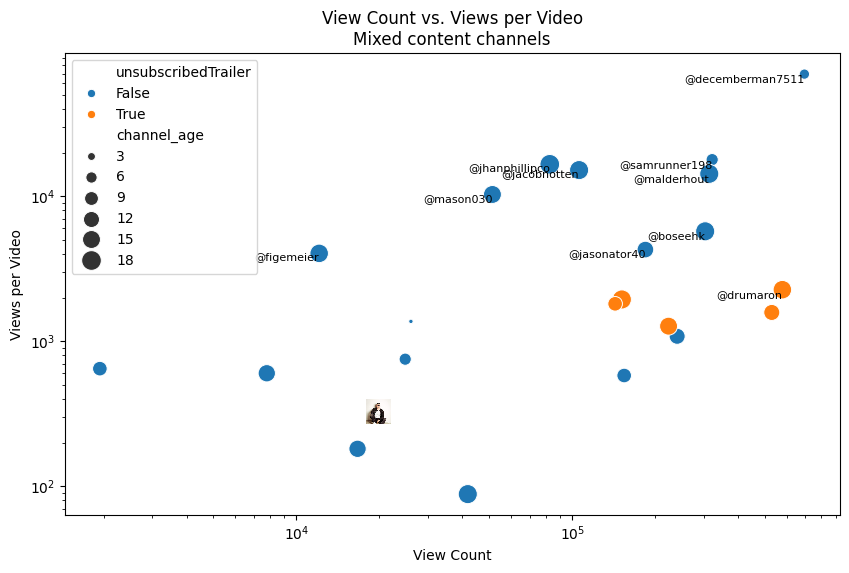

In [11]:
# visualise views and views per video as scatterplot for mixed content channels

# Calculate 'views_per_video' for your own channel
your_channel_view_count = 19760  # Example view count for your channel
your_channel_video_count = 61     # Example video count for your channel
your_channel_views_per_video = your_channel_view_count / your_channel_video_count

# Load the logo image
logo_img = Image.open('channels4_profile.jpg')  # Replace 'logo.png' with the filename of your logo image


# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mixed_df, x='viewCount', y='views_per_video', hue='unsubscribedTrailer', size='channel_age', sizes=(10, 200))

# Add your own channel data point with logo as marker
ab = AnnotationBbox(OffsetImage(logo_img, zoom=0.1), (your_channel_view_count, your_channel_views_per_video), frameon=False)
plt.gca().add_artist(ab)

plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('View Count')
plt.ylabel('Views per Video')
plt.title('View Count vs. Views per Video\nMixed content channels')

# Annotate top 10 performers in terms of 'views_per_video'
top_performers = mixed_df.nlargest(10, 'views_per_video')
for index, row in top_performers.iterrows():
    plt.text(row['viewCount'], row['views_per_video'], row['handle'], fontsize=8, ha='right', va='top')

# Show plot
plt.legend()
plt.show()

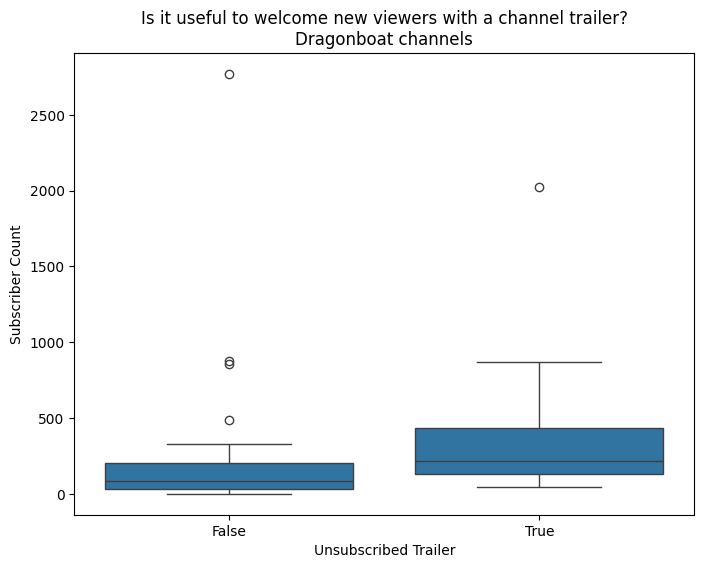

In [13]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=dragonboat_df, x='unsubscribedTrailer', y='subscriberCount')

# Set labels and title
plt.xlabel('Unsubscribed Trailer')
plt.ylabel('Subscriber Count')
plt.title('Is it useful to welcome new viewers with a channel trailer?\nDragonboat channels')

# Show plot
plt.show()

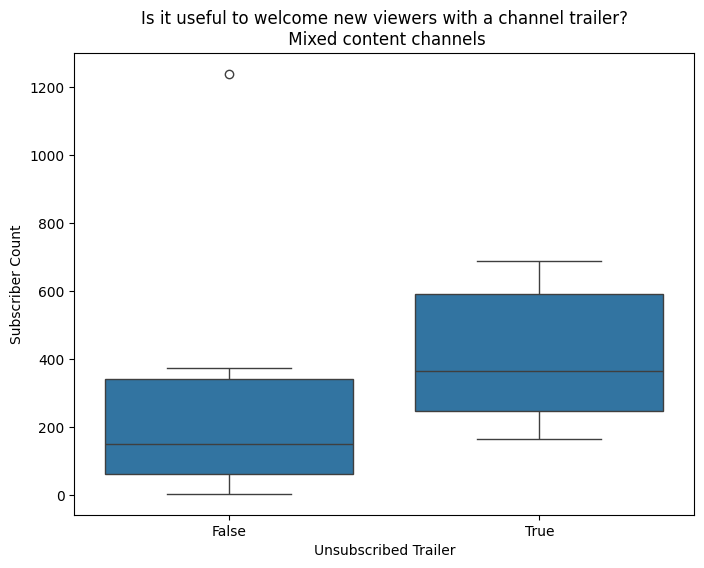

In [12]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=mixed_df, x='unsubscribedTrailer', y='subscriberCount')

# Set labels and title
plt.xlabel('Unsubscribed Trailer')
plt.ylabel('Subscriber Count')
plt.title('Is it useful to welcome new viewers with a channel trailer?\n Mixed content channels')

# Show plot
plt.show()

In [14]:
mixed_df.head()

,handle,id,title,description,customUrl,publishedAt,viewCount,subscriberCount,videoCount,topicIds,topicCategories,unsubscribedTrailer,uploads,views_per_video,views_per_sub,channel_age
2,@decemberman7511,UCvEFjZ5wtoxiy53WvTlmlvQ,December Man,Everything,https://www.youtube.com/@decemberman7511,2018-05-25,694281,1240,10,[/m/019_rr],[https://en.wikipedia.org/wiki/Lifestyle_(soci...,False,UUvEFjZ5wtoxiy53WvTlmlvQ,69428.100000,559.904032,5
15,@drumaron,UC3KIfRL0LL4vwIsT2c62lmg,Ron Williams,,https://www.youtube.com/@drumaron,2007-11-06,577658,592,255,"[/m/06ntj, /m/019_rr, /m/03glg]","[https://en.wikipedia.org/wiki/Sport, https://...",True,UU3KIfRL0LL4vwIsT2c62lmg,2265.325490,975.773649,16
5,@allanshek,UCgnUHMRCHIVnwC7X8O9Ad-A,Allan Shek,,https://www.youtube.com/@allanshek,2011-10-10,528760,689,335,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",True,UUgnUHMRCHIVnwC7X8O9Ad-A,1578.388060,767.431060,12
7,@samrunner198,UCg3e2mFTPDx0eTNCGWhXrUA,Sam Runner,,https://www.youtube.com/@samrunner198,2016-04-05,321526,354,18,"[/m/07yv9, /m/06ntj, /m/019_rr]","[https://en.wikipedia.org/wiki/Vehicle, https:...",False,UUg3e2mFTPDx0eTNCGWhXrUA,17862.555556,908.265537,7
16,@malderhout,UCPZrknKWGVQCckTa4fsQBFw,Maikel Alderhout,,https://www.youtube.com/@malderhout,2006-11-18,313799,163,22,[/m/06ntj],[https://en.wikipedia.org/wiki/Sport],False,UUPZrknKWGVQCckTa4fsQBFw,14263.590909,1925.147239,17
8,@boseehk,UCXikF5wf3CY2jr0KLUOJCgg,BoSeeHK,,https://www.youtube.com/@boseehk,2006-09-29,303308,340,53,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",False,UUXikF5wf3CY2jr0KLUOJCgg,5722.792453,892.082353,17
9,@dorkypanda101,UCv12bdIX-rRDuq5XUpVhJFw,Fanny Chen,,https://www.youtube.com/@dorkypanda101,2011-12-20,240034,374,222,"[/m/06ntj, /m/019_rr, /m/07yv9]","[https://en.wikipedia.org/wiki/Sport, https://...",False,UUv12bdIX-rRDuq5XUpVhJFw,1081.234234,641.802139,12
17,@korschi76,UCzZMphDFBrNEG8_4rbC1wkQ,Enrico Korschinek,,https://www.youtube.com/@korschi76,2008-07-31,223444,164,176,"[/m/019_rr, /m/06ntj]",[https://en.wikipedia.org/wiki/Lifestyle_(soci...,True,UUzZMphDFBrNEG8_4rbC1wkQ,1269.568182,1362.463415,15
13,@jasonator40,UC57euwhVOc3m09gOeAfTzEA,Jason Hong,Hey everyone! Thanks for visiting my page! Vid...,https://www.youtube.com/@jasonator40,2011-02-09,184161,360,43,"[/m/03glg, /m/019_rr]","[https://en.wikipedia.org/wiki/Hobby, https://...",False,UU57euwhVOc3m09gOeAfTzEA,4282.813953,511.558333,13
4,@jeremyrichmond7145,UCElz8mdkpSWRXd4tAGuPylw,Jeremy Richmond,,https://www.youtube.com/@jeremyrichmond7145,2013-08-24,154265,341,266,"[/m/0kt51, /m/06ntj, /m/019_rr, /m/027x7n]","[https://en.wikipedia.org/wiki/Health, https:/...",False,UUElz8mdkpSWRXd4tAGuPylw,579.943609,452.390029,10


In [50]:
# dragonboat_video_list = []
# for playlist_id in dragonboat_df['uploads']:
#     playlist_items = get_playlist_items_from_id(youtube, playlist_id)
#     dragonboat_video_list.extend(playlist_items)

# dragonboat_videos_df = pd.DataFrame(dragonboat_video_list).sort_values(by='viewCount', ascending=False)

In [52]:
#dragonboat_videos_df.to_csv('dragonboat_videos.csv', index=False)

In [3]:
dragonboat_videos_df = pd.read_csv('dragonboat_videos.csv')

In [4]:
dragonboat_videos_df.head()

,title,description,channelId,channelTitle,videoId,url,publishedAt,categoryId,duration,viewCount,likeCount,commentCount
0,The16thAsianGames DragonBoat 250m No6 決勝 Japan,The 16th Asian Games Dragon Boat,UCmPGStD91J6fyV2w7viDB4g,ISOKAZE.HARUNA,cCeXSN9wAis,https://youtu.be/cCeXSN9wAis,2010-11-24,17,0 days 00:01:36,859865,2384,35
1,How To Paddle - Dragon Boat Technique,Dragon Boat Technique\nDragon boat: How to pad...,UC80UXJlQJDhRvnM8H-_KBEg,22Dragons,Wv_4PDz_KWM,https://youtu.be/Wv_4PDz_KWM,2015-03-19,17,0 days 00:03:08,238928,1213,16
2,"MUST WATCH DRAGON BOAT CLIP!!! 一定要看, 龙舟影片!!",www.dbi.com.sg \n\nTaken from various dragon b...,UCUkhVebz6NhKjQIEpD4QoeA,Dragon Boat Innovate,iXVk71RtdFQ,https://youtu.be/iXVk71RtdFQ,2012-01-31,22,0 days 00:01:59,180267,401,23
3,RABA DBC @ TRAINING FOR THE DRAGON BOAT CHAMP ...,RABA DBC @ TRAINING FOR THE CHAMP x HDBF\nRaba...,UCB19iYbyIcuuiD8T0mlSREQ,Raba dragon,TBcDhU-iPfY,https://youtu.be/TBcDhU-iPfY,2019-07-28,17,0 days 00:01:35,123488,877,28
4,2017 Canadian National Dragon Boat Championshi...,"Race 36\nAugust 4, 2017\n\n1. DZ U24 Open (DZ ...",UCNNv38sk4GxEhvRwzbxrg3A,Eternal Dragon,FpcKkdvmu_k,https://youtu.be/FpcKkdvmu_k,2017-08-10,17,0 days 00:01:12,119242,541,0


In [5]:
# mixed_video_list = []
# for playlist_id in mixed_df['uploads']:
#     playlist_items = get_playlist_items_from_id(youtube, playlist_id)
#     mixed_video_list.extend(playlist_items)

# mixed_videos_df = pd.DataFrame(mixed_video_list).sort_values(by='viewCount', ascending=False)

In [6]:
#mixed_videos_df.to_csv('mixed_videos.csv', index=False)

In [7]:
mixed_videos_df = pd.read_csv('mixed_videos.csv')

In [8]:
mixed_videos_df.head()

,title,description,channelId,channelTitle,videoId,url,publishedAt,categoryId,duration,viewCount,likeCount,commentCount
0,Philippine airforce dragonboat team (AIR DRAGONS),PDBF REGATTA december 01 2019,UCvEFjZ5wtoxiy53WvTlmlvQ,December Man,rt6Zvrv2jH4,https://youtu.be/rt6Zvrv2jH4,2019-12-02,22,0 days 00:06:09,680924,6480,315
1,Belle Perez - Gypsy Kings medley (live & wides...,Belle Perez - Gypsy Kings medley (live & wides...,UCPZrknKWGVQCckTa4fsQBFw,Maikel Alderhout,sSHcdIYN_LM,https://youtu.be/sSHcdIYN_LM,2006-12-03,10,0 days 00:07:19,307017,783,45
2,Canadian National Dragon Boat Championships 20...,The 2017 Canadian Dragon Boat Championships at...,UCgnUHMRCHIVnwC7X8O9Ad-A,Allan Shek,Edhd8xvym_0,https://youtu.be/Edhd8xvym_0,2017-09-04,17,0 days 00:03:23,197090,1045,59
3,"Fastest 200m at the IDBF Worlds, Szeged Hungar...",11th IDBF World dragon boat racing championshi...,UC3KIfRL0LL4vwIsT2c62lmg,Ron Williams,2n5219HZ1zk,https://youtu.be/2n5219HZ1zk,2013-08-07,17,0 days 00:00:40,152033,325,6
4,British dragon boat teams get controversial in...,Amathus dbc and Wraysbury dbc fight it out in ...,UC3KIfRL0LL4vwIsT2c62lmg,Ron Williams,FK4MiC9uvWM,https://youtu.be/FK4MiC9uvWM,2015-05-12,17,0 days 00:05:33,150900,487,50


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Projekte\Youtube_Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Projekte\Youtube_Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21213 (\N{CJK UNIFIED IDEOGRAPH-52DD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Projekte\Youtube_Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Projekte\Youtube_Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

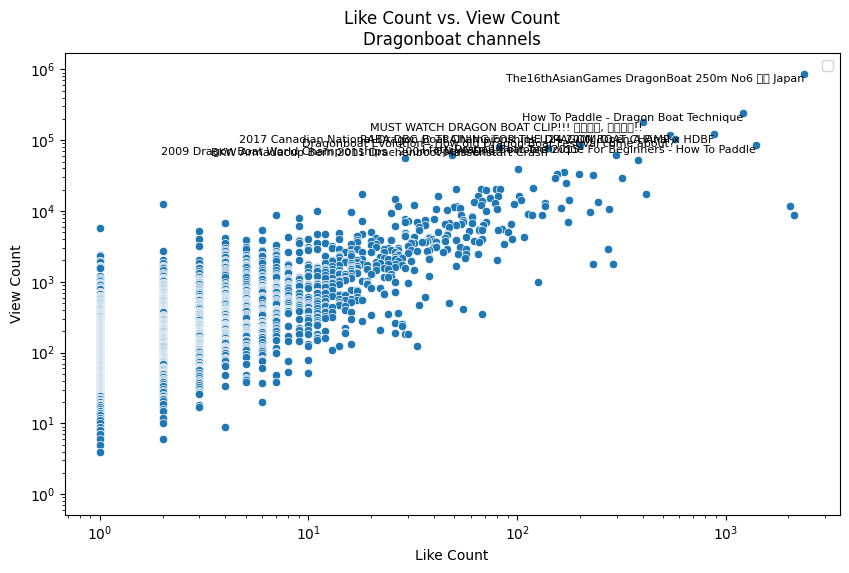

In [9]:
# visualise views and likes per video as scatterplot for dragonboat channels


# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dragonboat_videos_df, x='likeCount', y='viewCount', sizes=(10, 200))

plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('Like Count')
plt.ylabel('View Count')
plt.title('Like Count vs. View Count\nDragonboat channels')

# Annotate top 10 performers in terms of 'viewCount'
top_performers = dragonboat_videos_df.nlargest(10, 'viewCount')
for index, row in top_performers.iterrows():
    plt.text(row['likeCount'], row['viewCount'], row['title'], fontsize=8, ha='right', va='top')

# Show plot
plt.legend()
plt.show()

OK, this is not so useful. First I would like to know if videos from dragonboat focussed channels perform better than those from mixed channels. For this let's combine both dataframes after adding a type column.

In [10]:
dragonboat_videos_df['duration'] = dragonboat_videos_df['duration'].apply(pd.Timedelta).dt.seconds
mixed_videos_df['duration'] = mixed_videos_df['duration'].apply(pd.Timedelta).dt.seconds

In [11]:
dragonboat_videos_df['channelType'] = 'dragonboat'
mixed_videos_df['channelType'] = 'mixed content'

In [12]:
combined_videos_df = pd.concat([dragonboat_videos_df, mixed_videos_df], axis=0, ignore_index=True)

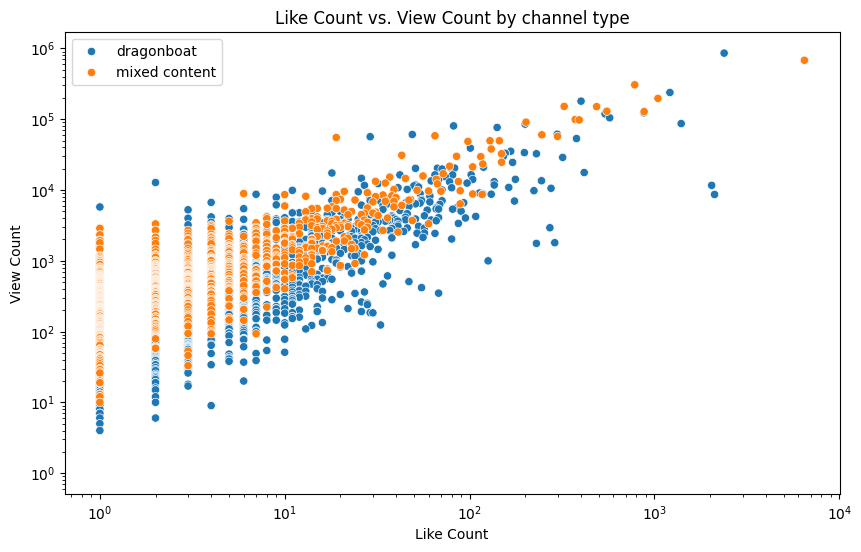

In [13]:
# visualise views and likes per video as scatterplot for all channels

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_videos_df, x='likeCount', y='viewCount', hue='channelType', sizes=(10, 200))

plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('Like Count')
plt.ylabel('View Count')
plt.title('Like Count vs. View Count by channel type')

# Annotate top 10 performers in terms of 'viewCount'
# top_performers = combined_videos_df.nlargest(10, 'viewCount')
# for index, row in top_performers.iterrows():
#     plt.text(row['likeCount'], row['viewCount'], row['title'], fontsize=8, ha='right', va='top')

# Show plot
plt.legend()
plt.show()

Also not too helpful. I tend to see a bit more videos from dragonboat-focussed channels achieving both higher likes and higher viewcounts.
Maybe let's have a look at only the more recent years.

In [14]:
recent_videos_df = combined_videos_df[combined_videos_df['publishedAt']>= '2022-01-01']

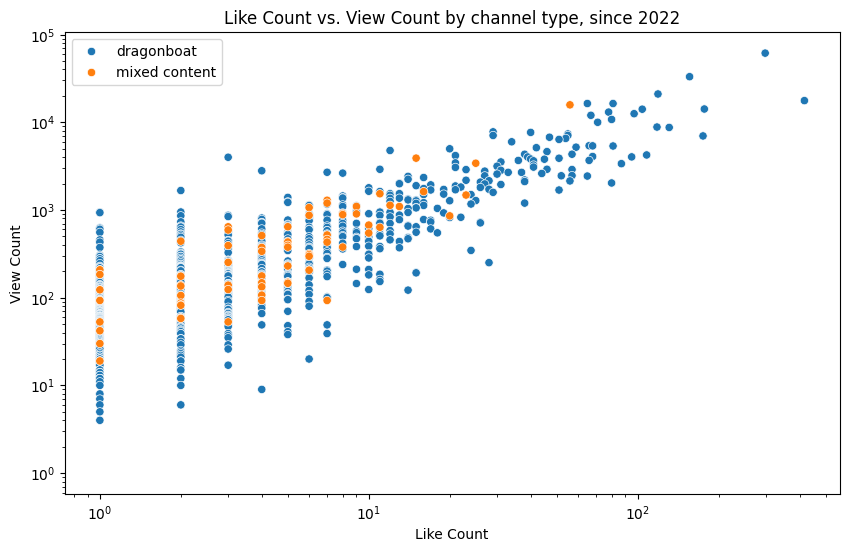

In [15]:
# visualise views and likes per video as scatterplot for all channels

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recent_videos_df, x='likeCount', y='viewCount', hue='channelType', sizes=(10, 200))

plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('Like Count')
plt.ylabel('View Count')
plt.title('Like Count vs. View Count by channel type, since 2022')

# Show plot
plt.legend()
plt.show()

This is more striking. Videos from mixed content channels have not been performing as well as those from dragonboat-focussed channels, in either views or likes.

Next, let's also have a look at other drivers of success. Do viewers have a preference for longer or shorter durations? Does it affect views or likes?

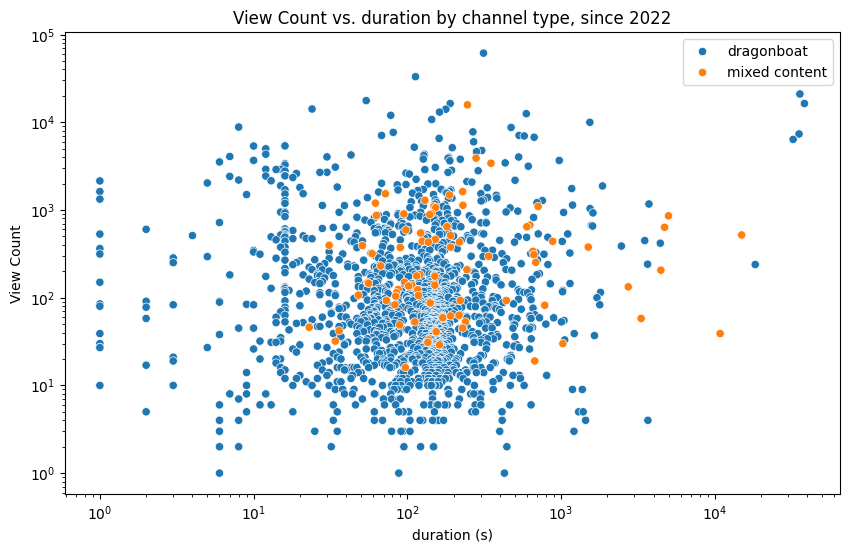

In [16]:
# visualise duration and likes per video as scatterplot for all channels

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recent_videos_df, x='duration', y='viewCount', hue='channelType', sizes=(10, 200))

plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('duration (s)')
plt.ylabel('View Count')
plt.title('View Count vs. duration by channel type, since 2022')

# Show plot
plt.legend()
plt.show()

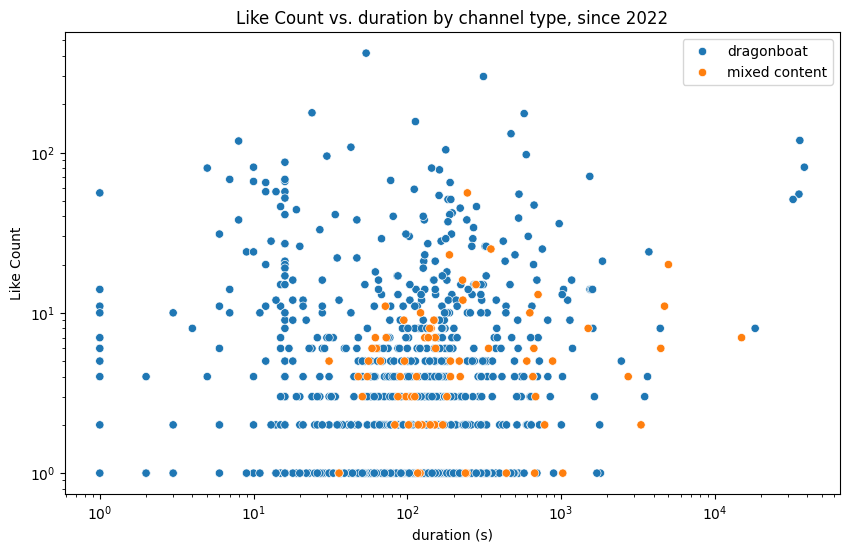

In [17]:
# visualise duration and likes per video as scatterplot for all channels

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recent_videos_df, x='duration', y='likeCount', hue='channelType', sizes=(10, 200))

plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('duration (s)')
plt.ylabel('Like Count')
plt.title('Like Count vs. duration by channel type, since 2022')

# Show plot
plt.legend()
plt.show()

That seems reassuring. the duration of videos does not seem to have any clear relationship with views and likes. What one can see is a strong concentration of videos with a length between one and three minutes, so e.g. videos of inidividual races. So one could assume this audience is more used to shorter videos but that does not necessarily mean that longer videos are less likely to be clicked.

In [18]:
# let's also check the distribution of duration in numbers
recent_videos_df.groupby('channelType')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
channelType,,,,,,,,
dragonboat,1606.0,284.173724,1840.704500,1.0,65.00,136.0,180.5,38269.0
mixed content,84.0,763.142857,2158.552846,23.0,95.75,151.0,294.5,14947.0


In [19]:
import statsmodels.api as sm

# Add constant term for the intercept
recent_videos_df['intercept'] = 1

# Linear regression for likeCount against duration_seconds
likeCount_model = sm.OLS(recent_videos_df['likeCount'], recent_videos_df[['duration', 'intercept']])
likeCount_results = likeCount_model.fit()
print(likeCount_results.summary())

# Linear regression for viewCount against duration_seconds
viewCount_model = sm.OLS(recent_videos_df['viewCount'], recent_videos_df[['duration', 'intercept']])
viewCount_results = viewCount_model.fit()
print(viewCount_results.summary())

                            OLS Regression Results                            
Dep. Variable:              likeCount   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     56.43
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           9.41e-14
Time:                        19:35:02   Log-Likelihood:                -7312.8
No. Observations:                1690   AIC:                         1.463e+04
Df Residuals:                    1688   BIC:                         1.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0018      0.000      7.512      0.0

C:\Users\a_mel\AppData\Local\Temp\ipykernel_22252\3961378956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_videos_df['intercept'] = 1


In [21]:
# Fill missing values in the 'description' column with an empty string
recent_videos_df['description'] = recent_videos_df['description'].fillna('')

recent_videos_df['hashtags'] = recent_videos_df['description'].apply(extract_hashtags)

C:\Users\a_mel\AppData\Local\Temp\ipykernel_22252\1243930413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_videos_df['description'] = recent_videos_df['description'].fillna('')
C:\Users\a_mel\AppData\Local\Temp\ipykernel_22252\1243930413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_videos_df['hashtags'] = recent_videos_df['description'].apply(extract_hashtags)


In [23]:
from collections import Counter

# Flatten the lists of hashtags
all_hashtags = [hashtag for hashtags_list in recent_videos_df['hashtags'] for hashtag in hashtags_list]

# Count the frequency of each hashtag
hashtag_frequency = Counter(all_hashtags)

# Order the dictionary in descending order according to the frequency
hashtag_frequency_ordered = dict(hashtag_frequency.most_common())

# Display the frequency of hashtags
print(hashtag_frequency_ordered)

{'#TeamSports': 89, '#PaddleWithPride': 64, '#RiptideDragonBoatTeam': 64, '#DragonBoat': 60, '#dragonboat': 59, '#DragonBoatPH': 56, '#DragonBoatRacing': 53, '#RiptideDragonBoat': 51, '#Fitness': 51, '#Motivation': 51, '#TaraSagwan': 51, '#KayaMongSumagwan': 50, '#DragonBoatTeam': 49, '#WaterSports': 49, '#PCKDF': 49, '#DragonBoatTraining': 48, '#Phillippines': 48, '#Paddling': 48, '#Paddlers': 48, '#PaddleSports': 48, '#Sports': 48, '#Teamwork': 48, '#Health': 48, '#Goals': 48, '#Training': 47, '#PH': 47, '#Paddle': 47, '#Team': 47, '#BucketList': 47, '#KayaMindSet': 47, '#Sagwan': 47, '#DragonBoatFestival': 42, '#DragonBoatCompetition': 41, '#oc1': 16, '#paddler': 14, '#training': 11, '#jakartapaddleclub': 11, '#GoPro': 11, '#trainingtips': 10, '#crosstrains': 10, '#rowing': 8, '#dragonboattraining': 8, '#rabadragon': 8, '#gohardpaddle': 8, '#hdbf': 8, '#Philippines': 8, '#philippines': 7, '#jakartapiratepaddlers': 7, '#dragonboatfestival': 6, '#paddling': 6, '#team': 6, '#shorts': 6

In [24]:
hashtag_frequency_ordered

{'#TeamSports': 89,
 '#PaddleWithPride': 64,
 '#RiptideDragonBoatTeam': 64,
 '#DragonBoat': 60,
 '#dragonboat': 59,
 '#DragonBoatPH': 56,
 '#DragonBoatRacing': 53,
 '#RiptideDragonBoat': 51,
 '#Fitness': 51,
 '#Motivation': 51,
 '#TaraSagwan': 51,
 '#KayaMongSumagwan': 50,
 '#DragonBoatTeam': 49,
 '#WaterSports': 49,
 '#PCKDF': 49,
 '#DragonBoatTraining': 48,
 '#Phillippines': 48,
 '#Paddling': 48,
 '#Paddlers': 48,
 '#PaddleSports': 48,
 '#Sports': 48,
 '#Teamwork': 48,
 '#Health': 48,
 '#Goals': 48,
 '#Training': 47,
 '#PH': 47,
 '#Paddle': 47,
 '#Team': 47,
 '#BucketList': 47,
 '#KayaMindSet': 47,
 '#Sagwan': 47,
 '#DragonBoatFestival': 42,
 '#DragonBoatCompetition': 41,
 '#oc1': 16,
 '#paddler': 14,
 '#training': 11,
 '#jakartapaddleclub': 11,
 '#GoPro': 11,
 '#trainingtips': 10,
 '#crosstrains': 10,
 '#rowing': 8,
 '#dragonboattraining': 8,
 '#rabadragon': 8,
 '#gohardpaddle': 8,
 '#hdbf': 8,
 '#Philippines': 8,
 '#philippines': 7,
 '#jakartapiratepaddlers': 7,
 '#dragonboatfestiv

In [27]:
# Let's also visualize the importance of hashtags in a bar chart

recent_videos_df.loc[:,'has_hashtags'] = recent_videos_df['hashtags'].apply(len) > 0

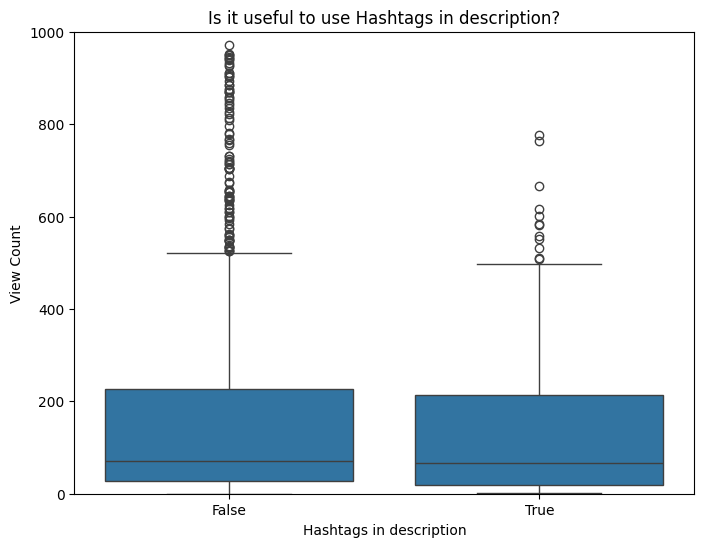

In [30]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=recent_videos_df, x='has_hashtags', y='viewCount')

# Set the y-axis limits to ignore extreme values
plt.ylim(0, 1000)

# Set labels and title
plt.xlabel('Hashtags in description')
plt.ylabel('View Count')
plt.title('Is it useful to use Hashtags in description?')

# Show plot
plt.show()

Hashtags don't seem to be important.

How about the importance of having a description, or the length of the description?

In [31]:
recent_videos_df.loc[:,'has_description'] = recent_videos_df['description'].apply(len) > 0

C:\Users\a_mel\AppData\Local\Temp\ipykernel_22252\617577677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_videos_df.loc[:,'has_description'] = recent_videos_df['description'].apply(len) > 0


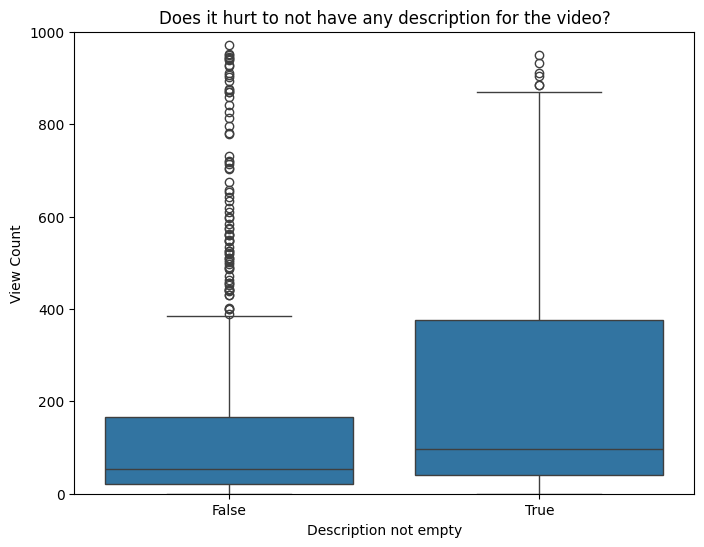

In [32]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=recent_videos_df, x='has_description', y='viewCount')

# Set the y-axis limits to ignore extreme values
plt.ylim(0, 1000)

# Set labels and title
plt.xlabel('Description not empty')
plt.ylabel('View Count')
plt.title('Does it hurt to not have any description for the video?')

# Show plot
plt.show()

In [33]:
# what about the length of the descriptions?

recent_videos_df.loc[:,'description_length'] = recent_videos_df['description'].apply(len)

C:\Users\a_mel\AppData\Local\Temp\ipykernel_22252\2707857287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_videos_df.loc[:,'description_length'] = recent_videos_df['description'].apply(len)


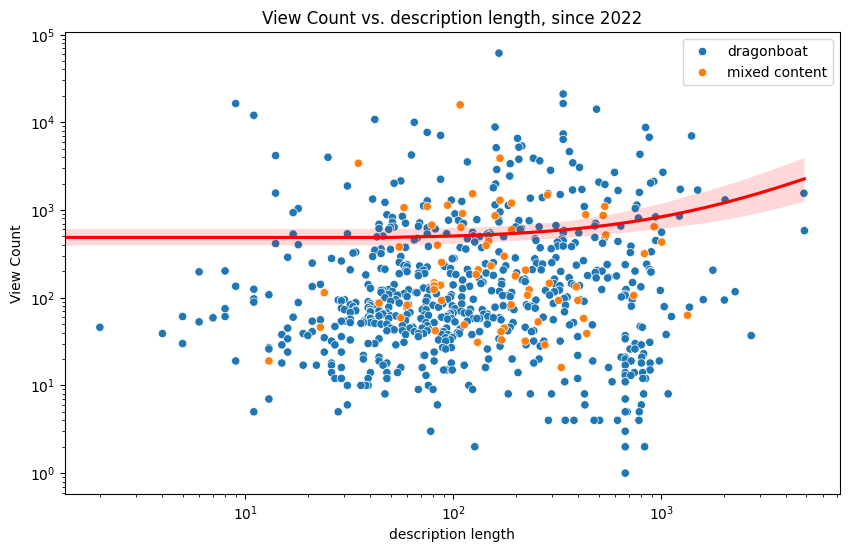

In [40]:
# visualise duration and likes per video as scatterplot for all channels

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recent_videos_df, x='description_length', y='viewCount', hue='channelType', sizes=(10, 200))

plt.xscale('log')
plt.yscale('log')

# Add a regression line
sns.regplot(data=recent_videos_df, x='description_length', y='viewCount', scatter=False, color='red')

# Set labels and title
plt.xlabel('description length')
plt.ylabel('View Count')
plt.title('View Count vs. description length, since 2022')

# Show plot
plt.legend()
plt.show()

The actual length of the descriptions does not seem to matter so much.

In [19]:
#how many topic categories do the channels have?
dragonboat_df['topicCategories'].apply(len)

5     3
10    3
7     3
2     3
9     3
4     3
8     5
15    4
12    3
3     3
6     2
1     3
11    3
14    3
0     3
13    3
Name: topicCategories, dtype: int64

In [80]:
channel_topic_list = []

# Fill in values from 'handle' and 'topicCategories'
for index, row in dragonboat_df.iterrows():
    handle = row['handle']
    categories = row['topicCategories']
    categories_dict = {f'category{i+1}': categories[i] if i < len(categories) else None for i in range(5)}
    categories_dict['handle'] = handle
    channel_topic_list.append(categories_dict)


new__dragonboat_df = pd.DataFrame(channel_topic_list)

C:\Users\a_mel\AppData\Local\Temp\ipykernel_5468\4132384513.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in sorted_categories], y=[x[0] for x in sorted_categories], palette='viridis')


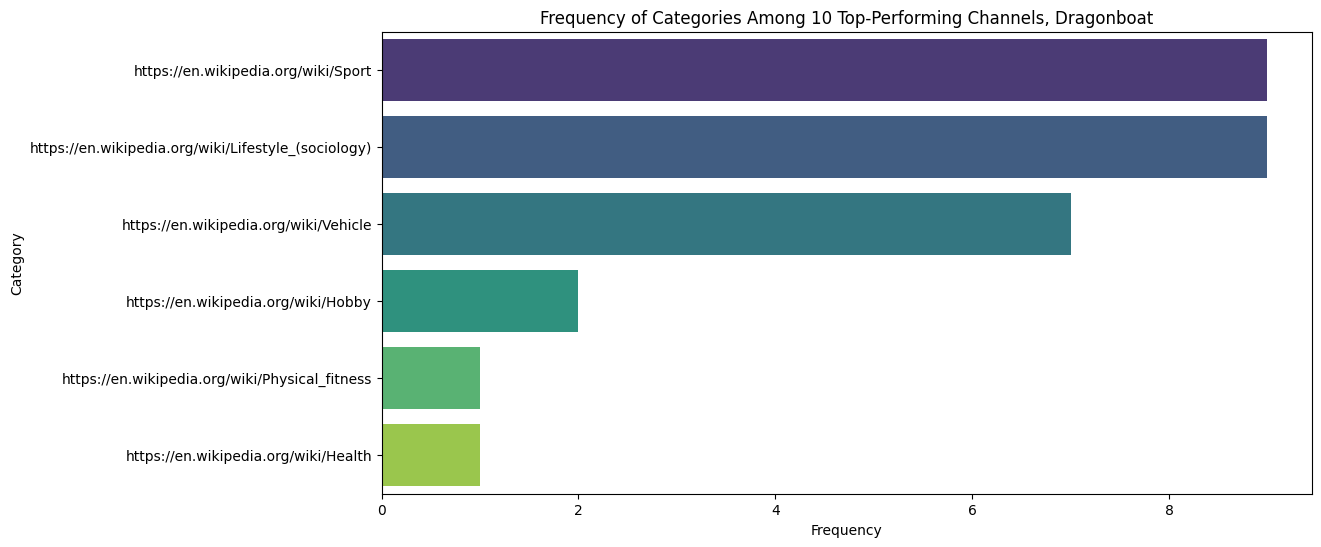

In [86]:
# Example: Calculate success metrics (viewCount, subscriberCount, views_per_video) and identify top-performing channels
# This step depends on how you define "top-performing" channels.

top_performers = dragonboat_df[:10]

# Example: Extract categories for top-performing channels
top_performers_categories = []
for index, row in top_performers.iterrows():
    top_performers_categories.extend(row['topicCategories'])

# Example: Count frequency of each category
category_counts = {}
for category in top_performers_categories:
    if category in category_counts:
        category_counts[category] += 1
    else:
        category_counts[category] = 1

# Example: Sort categories by frequency
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Example: Visualize frequency of categories using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[1] for x in sorted_categories], y=[x[0] for x in sorted_categories], palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Frequency of Categories Among 10 Top-Performing Channels, Dragonboat')
plt.show()

In [87]:
my_channel_data = get_channel_data_from_handle(youtube, 'AlexMelemenidis')

In [88]:
my_channel_data['topicCategories']

['https://en.wikipedia.org/wiki/Hobby',
 'https://en.wikipedia.org/wiki/Sport',
 'https://en.wikipedia.org/wiki/Tourism',
 'https://en.wikipedia.org/wiki/Lifestyle_(sociology)']

In [90]:
my_channel_data

{'handle': '@alexmelemenidis',
 'id': 'UC7p805M43uY6WrJ29v3Fe7g',
 'title': 'Alex Melemenidis',
 'description': "What's up, everyone!\nMy name is Alex and I live in Frankfurt am Main, Germany. In my free time I like to travel, paddle in a dragonboat and do all other kinds of sports and last but not least: edit videos and share them with the world via YouTube!\n\nYou can find me also on Instagram:\nhttps://www.instagram.com/lazodeuts/\n\n",
 'customUrl': 'https://www.youtube.com/@alexmelemenidis',
 'publishedAt': datetime.date(2006, 10, 22),
 'viewCount': 19760,
 'subscriberCount': 40,
 'videoCount': 61,
 'topicIds': ['/m/03glg', '/m/06ntj', '/g/120yrv6h', '/m/019_rr'],
 'topicCategories': ['https://en.wikipedia.org/wiki/Hobby',
  'https://en.wikipedia.org/wiki/Sport',
  'https://en.wikipedia.org/wiki/Tourism',
  'https://en.wikipedia.org/wiki/Lifestyle_(sociology)'],
 'unsubscribedTrailer': False,
 'uploads': 'UU7p805M43uY6WrJ29v3Fe7g'}

In [2]:
my_videos_list = get_playlist_items_from_id(youtube, 'UU7p805M43uY6WrJ29v3Fe7g')

my_videos_df = pd.DataFrame(my_videos_list)

HttpError: <HttpError 403 when requesting https://youtube.googleapis.com/youtube/v3/playlistItems?part=snippet%2CcontentDetails&playlistId=UU7p805M43uY6WrJ29v3Fe7g&maxResults=50&alt=json returned "The request cannot be completed because you have exceeded your <a href="/youtube/v3/getting-started#quota">quota</a>.". Details: "[{'message': 'The request cannot be completed because you have exceeded your <a href="/youtube/v3/getting-started#quota">quota</a>.', 'domain': 'youtube.quota', 'reason': 'quotaExceeded'}]">

In [15]:
my_videos_df[['title', 'videoId']].to_csv('my_uploads.csv', index=False)

In [2]:
my_activities_list = get_activities_data_from_id(youtube, 'UC7p805M43uY6WrJ29v3Fe7g')

my_activities_df = pd.DataFrame(my_activities_list)

HttpError: <HttpError 403 when requesting https://youtube.googleapis.com/youtube/v3/activities?part=contentDetails%2Csnippet&channelId=UC7p805M43uY6WrJ29v3Fe7g&maxResults=50&alt=json returned "The request cannot be completed because you have exceeded your <a href="/youtube/v3/getting-started#quota">quota</a>.". Details: "[{'message': 'The request cannot be completed because you have exceeded your <a href="/youtube/v3/getting-started#quota">quota</a>.', 'domain': 'youtube.quota', 'reason': 'quotaExceeded'}]">

In [95]:
# Okay it appears activities of type = 'playlistItem' are all other types of changes, like adjustments to the descriptions.

# I changed my descriptions and titles from 18 to 19 Feb 2024, latest uploads were the Ski video on 18 Feb and the Thailand video on 11 Feb

In [4]:
# youtube analytics

my_analytics_list = []

#for video in my_videos_df['videoId']:
for video in old_videos:
    analytics_df = get_analytics_data_per_video(youtubeAnalytics, videoId=video, startDate='2024-01-01', endDate='2024-03-16')
    my_analytics_list.append(analytics_df)

In [5]:
my_analytics_df = pd.concat(my_analytics_list, axis=0, ignore_index=True)

In [6]:
my_analytics_df.head()

,day,views,likes,shares,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,annotationImpressions,annotationClickThroughRate,annotationCloseRate,videoId
0,2024-01-01,0,0,0,0,0,0.0,0,0,0,4UYevtuy5Dg
1,2024-01-02,0,0,0,0,0,0.0,0,0,0,4UYevtuy5Dg
2,2024-01-03,0,0,0,0,0,0.0,0,0,0,4UYevtuy5Dg
3,2024-01-04,0,0,0,0,0,0.0,0,0,0,4UYevtuy5Dg
4,2024-01-05,0,0,0,0,0,0.0,0,0,0,4UYevtuy5Dg


In [7]:
my_analytics_df['day'] = pd.to_datetime(my_analytics_df['day'])

In [8]:
# let's use only the videos that were not new, but were those where I changed titles, descriptions and thumbnails

old_videos = ['4UYevtuy5Dg', 'RNPu4vywWtQ','PnuKrfa1WXQ','5sDNYWaH_j0','JqDFkySxqJw','BBFpTBdLstc','PBPtfJZV0zU','kBDAXVUbSRQ',
'Y2yMeeT_lGQ','FVIQas0WJ4s','2DaIjqiv5_E','zU26N0eHZHo','ES4m8mIANI0','xZLzIolu2R0','HBN41CdWIAE','IJCq-83k3zs',
'cUHrTkaDi5g','mOJlyDBsjyk','KO_N4XkvEgA','qcNssx6gKpw','pLcLqx32tV0','EX8UjdeIfss','IaM5yeSlfMM','0Uck3DZIRso',
'TWF9bikd00I','E7Ie93oR2HU','prpbXRIaOaY','hxdoSA7vafg','rqOwQuLhU_Q','bWhN5ufX0Ac','BzI7WOGNQyc','jL9XJAFUZYc',
'dgqqKcy_2DY','FRQ6VwpJKoc','mT3F8_R7_aM','lK0pUV7xSVY','ODDtQ_1Wamo','V36c07F_k5I','HJMbT0be98o','Kt6uK-y32ps',
'KTUm6Q63sJw','BBA1-apEp4Y','hiHdhN1OMR8','QKu05E5mIQA','GNahA3H-oX0'
]

In [9]:
analytics_df_old = my_analytics_df[my_analytics_df['videoId'].isin(old_videos)]

In [10]:
aggregate_old_df = analytics_df_old.groupby('day')[['annotationImpressions', 'views']].sum()

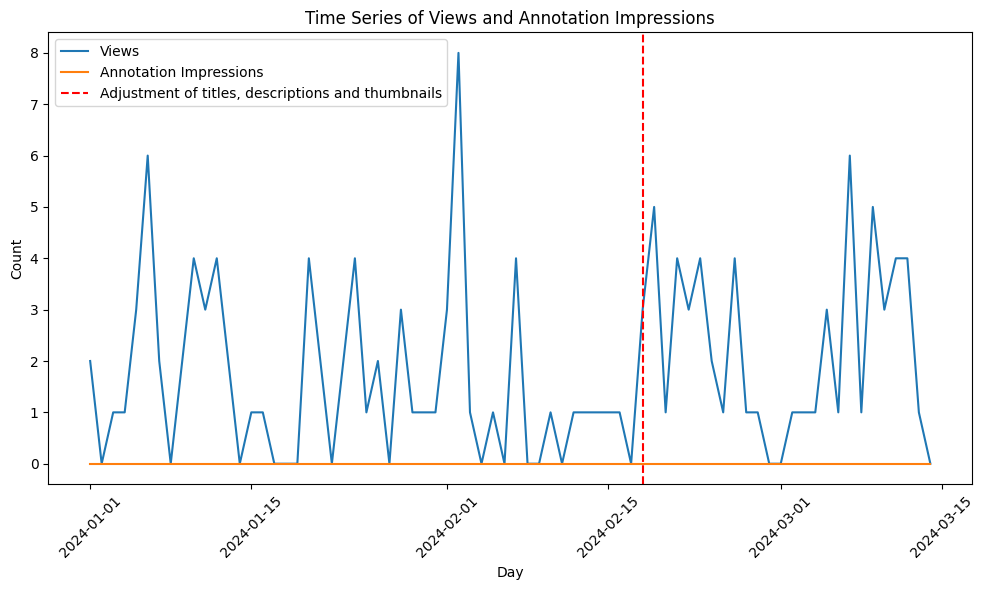

In [11]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregate_old_df, x='day', y='views', label='Views')
sns.lineplot(data=aggregate_old_df, x='day', y='annotationImpressions', label='Annotation Impressions')

# Add a vertical line at 2024-02-18
plt.axvline(x=datetime(2024,2,18), color='red', linestyle='--', label='Adjustment of titles, descriptions and thumbnails')

# Set labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Time Series of Views and Annotation Impressions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


In [ ]:
# It looks a bit better, but not much. Is annotationImpressions maybe not the variable I want to see?